In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Using Seaborn's Titanic Dataset:

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df=sns.load_dataset('titanic')

### Basic Analysis of the DataFrame

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

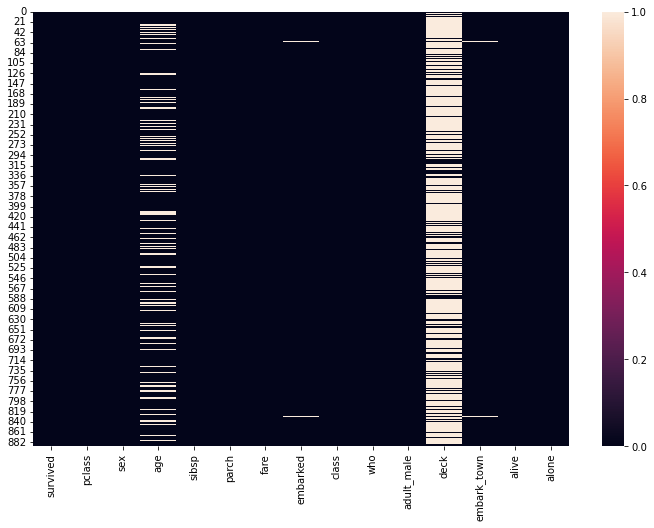

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

### Feature Engineering

#### Handling Missing Values:

In [10]:
df['age'].isnull().sum()

177

In [11]:
df['age'].median()

28.0

In [12]:
df['age'].fillna(df['age'].median(),inplace=True)

In [13]:
df['age'].isnull().sum()

0

In [14]:
df['deck'].isnull().sum()

688

#### As there are too many missing values.. So, it is good to drop the entire column..

In [15]:
df.drop(columns=['deck'],inplace=True)

In [16]:
df['embark_town'].isnull().sum()

2

In [17]:
df['embark_town'].mode()[0]

'Southampton'

In [18]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [19]:
df['embark_town'].isnull().sum()

0

In [20]:
df['embarked'].isnull().sum()

2

In [21]:
df['embarked'].mode()[0]

'S'

In [22]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [23]:
df['embarked'].isnull().sum()

0

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<AxesSubplot:>

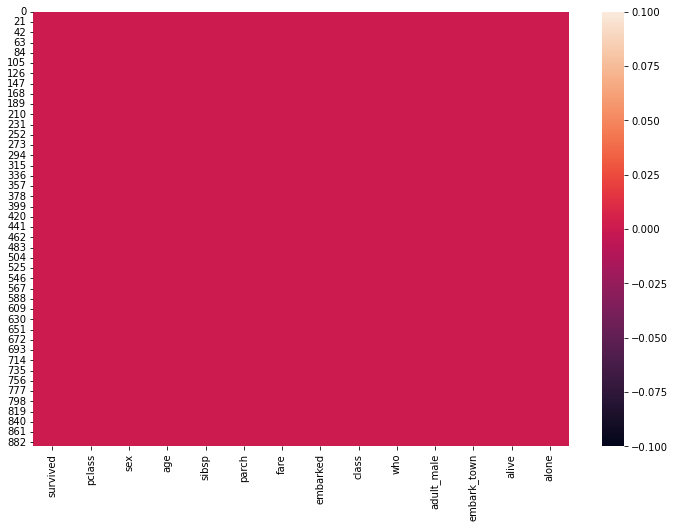

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

### We have successfully handled all the missing values..

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [27]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

### Let's check the co-relation among the features..

In [28]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

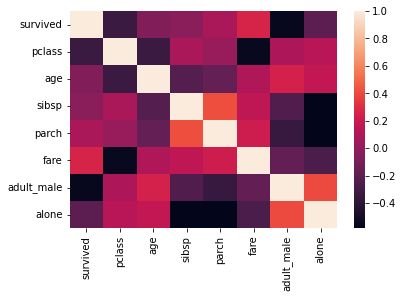

In [29]:
sns.heatmap(df.corr())

In [30]:
df.corrwith(df['survived'])

survived      1.000000
pclass       -0.338481
age          -0.064910
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
dtype: float64

In [31]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


### EDA

In [32]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='survived', ylabel='count'>

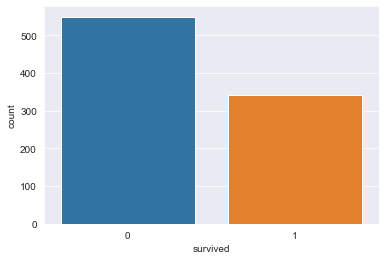

In [33]:
sns.countplot(df['survived'])

<AxesSubplot:xlabel='survived', ylabel='count'>

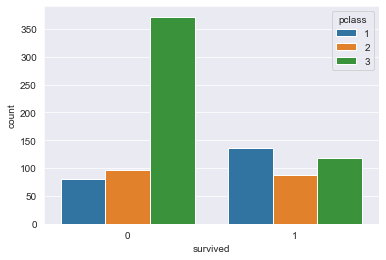

In [34]:
sns.countplot(df['survived'],hue=df['pclass'])

<AxesSubplot:xlabel='survived', ylabel='count'>

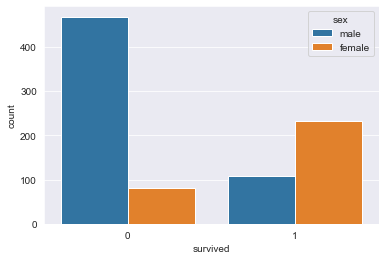

In [35]:
sns.countplot(df['survived'],hue=df['sex'])

<AxesSubplot:xlabel='age', ylabel='Count'>

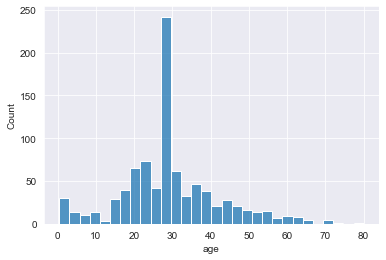

In [36]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='survived'>

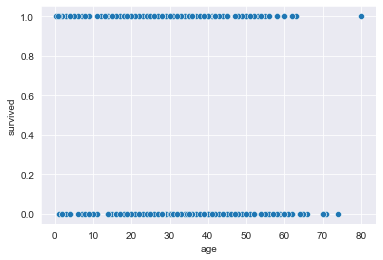

In [37]:
sns.scatterplot(df['age'],df['survived'])

<AxesSubplot:xlabel='age', ylabel='Count'>

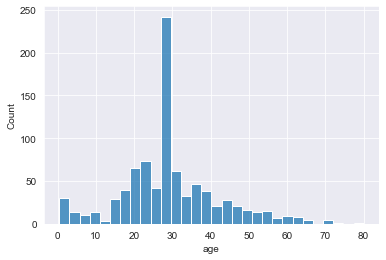

In [38]:
sns.histplot(df['age'])

In [39]:
df[df['survived']==0]['age'].mean()

30.028233151183972

In [40]:
df[df['survived']==1]['age'].mean()

28.29143274853801

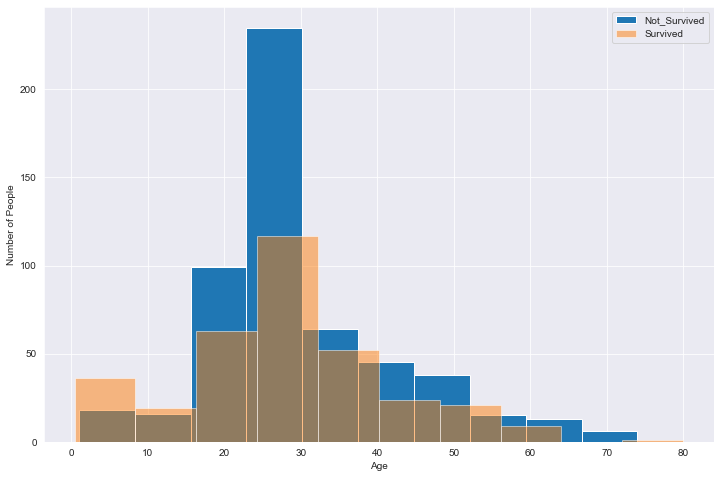

In [41]:
plt.figure(figsize=(12,8))
plt.hist(df[df['survived']==0]['age'])
plt.hist(df[df['survived']==1]['age'],alpha=.5)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend(["Not_Survived", "Survived"], loc=0)
plt.show()

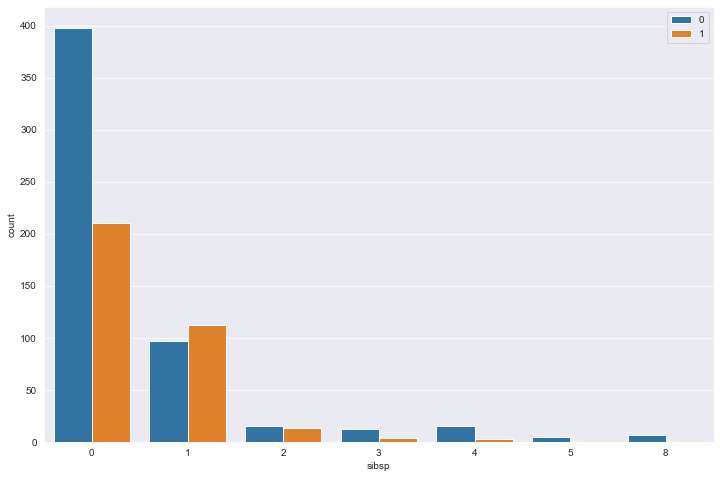

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(df['sibsp'],hue=df['survived'])
plt.legend(loc=1)

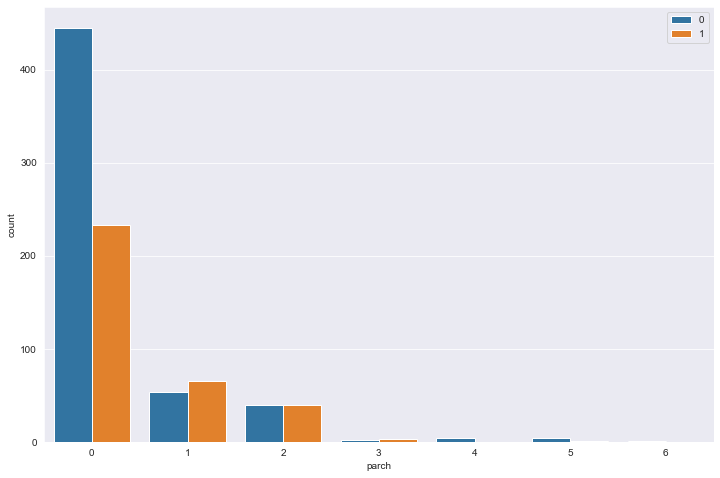

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(df['parch'],hue=df['survived'])
plt.legend(loc=1)

<AxesSubplot:xlabel='age', ylabel='fare'>

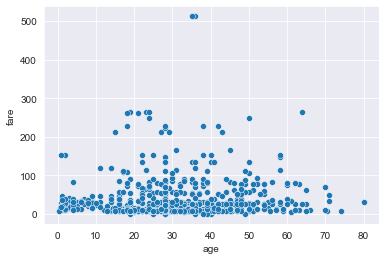

In [44]:
sns.scatterplot(df['age'],df['fare'])

<AxesSubplot:xlabel='fare', ylabel='age'>

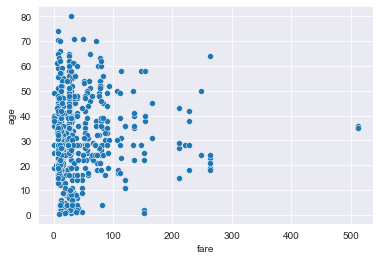

In [45]:
sns.scatterplot(df['fare'],df['age'])

<AxesSubplot:xlabel='fare', ylabel='Count'>

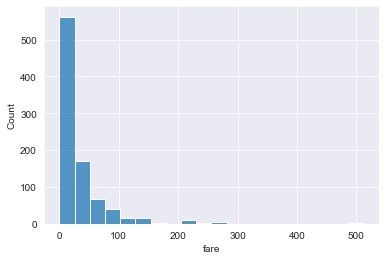

In [46]:
sns.histplot(df.fare,bins=20)

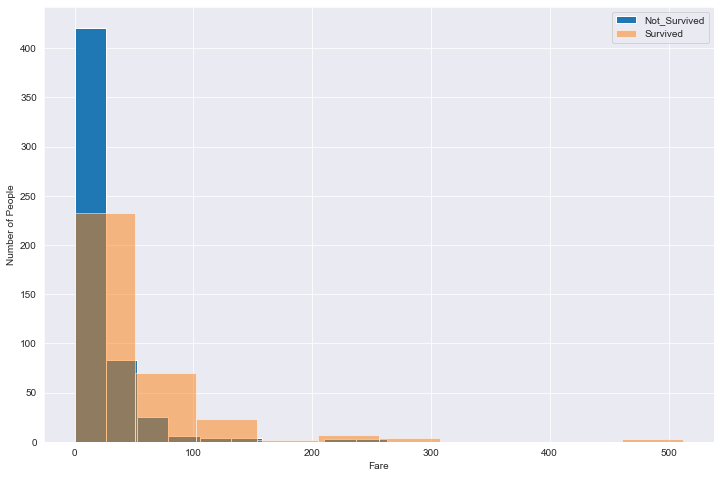

In [47]:
plt.figure(figsize=(12,8))
plt.hist(df[df['survived']==0]['fare'])
plt.hist(df[df['survived']==1]['fare'],alpha=.5)
plt.xlabel('Fare')
plt.ylabel('Number of People')
plt.legend(["Not_Survived", "Survived"], loc=0)
plt.show()

<AxesSubplot:xlabel='survived', ylabel='fare'>

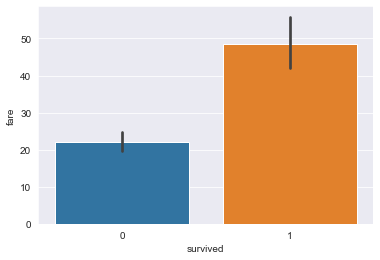

In [48]:
sns.barplot(df['survived'],df['fare'])

<AxesSubplot:xlabel='survived', ylabel='fare'>

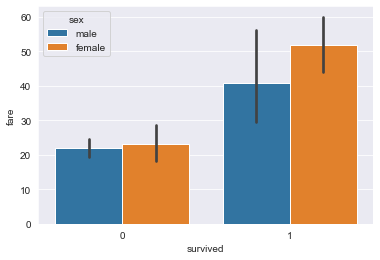

In [49]:
sns.barplot(df['survived'],df['fare'],hue=df['sex'])

<AxesSubplot:xlabel='survived', ylabel='age'>

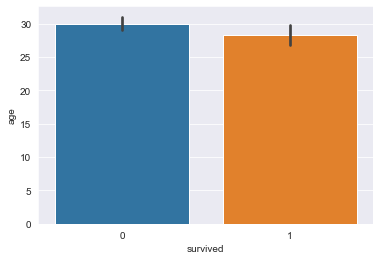

In [50]:
sns.barplot(df['survived'],df['age'])

<AxesSubplot:xlabel='survived', ylabel='age'>

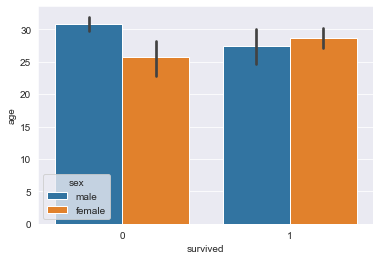

In [51]:
sns.barplot(df['survived'],df['age'],hue=df['sex'])

In [52]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [53]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:xlabel='survived', ylabel='count'>

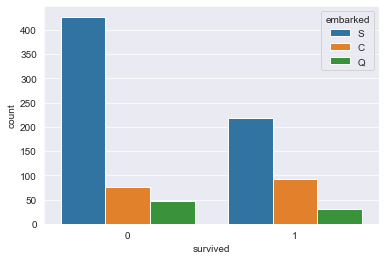

In [54]:
sns.countplot(df['survived'],hue=df['embarked'])

<AxesSubplot:xlabel='survived', ylabel='count'>

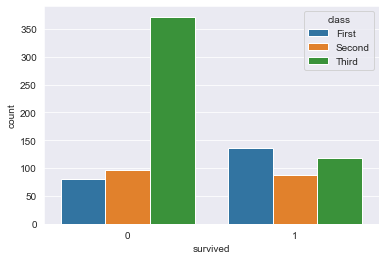

In [55]:
sns.countplot(df['survived'],hue=df['class'])

<AxesSubplot:xlabel='survived', ylabel='count'>

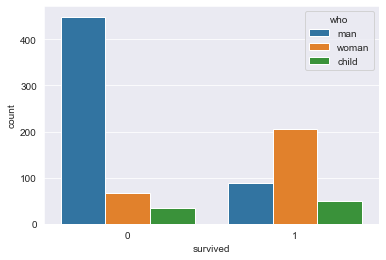

In [56]:
sns.countplot(df['survived'],hue=df['who'])

<AxesSubplot:xlabel='survived', ylabel='count'>

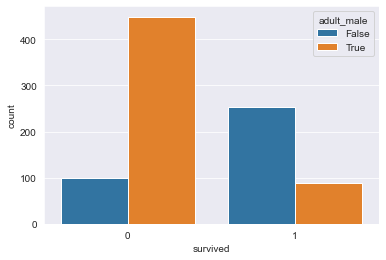

In [57]:
sns.countplot(df['survived'],hue=df['adult_male'])

<AxesSubplot:xlabel='survived', ylabel='count'>

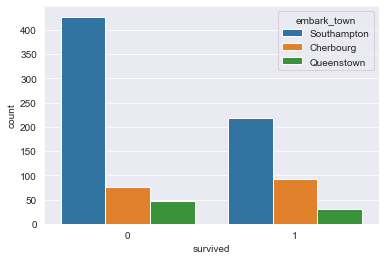

In [58]:
sns.countplot(df['survived'],hue=df['embark_town'])

<AxesSubplot:xlabel='survived', ylabel='count'>

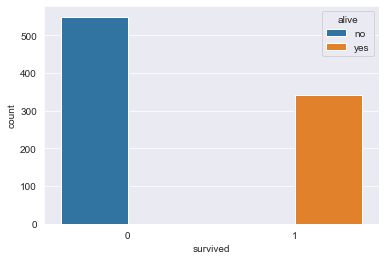

In [59]:
sns.countplot(df['survived'],hue=df['alive'])

<AxesSubplot:xlabel='survived', ylabel='count'>

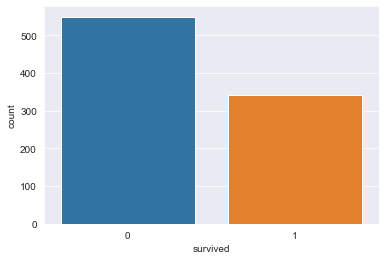

In [60]:
sns.countplot(df['survived'])

<AxesSubplot:xlabel='alive', ylabel='count'>

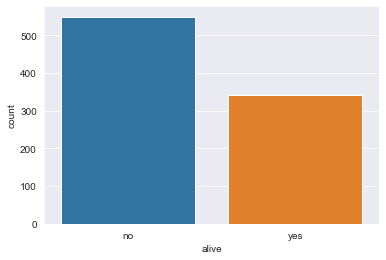

In [61]:
sns.countplot(df['alive'])

#### Conclusion : Duplicate Data column must be dropped..

<AxesSubplot:xlabel='survived', ylabel='count'>

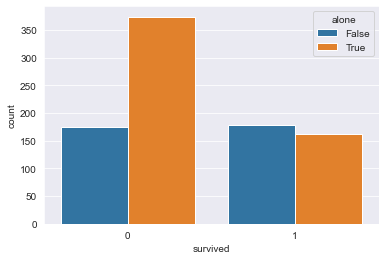

In [62]:
sns.countplot(df['survived'],hue=df['alone'])

<AxesSubplot:xlabel='survived', ylabel='count'>

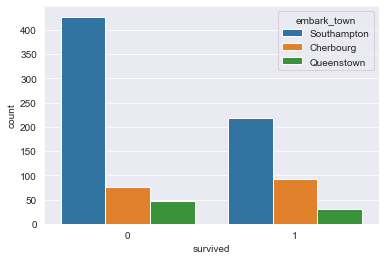

In [63]:
sns.countplot(df['survived'],hue=df['embark_town'])

<AxesSubplot:xlabel='survived', ylabel='count'>

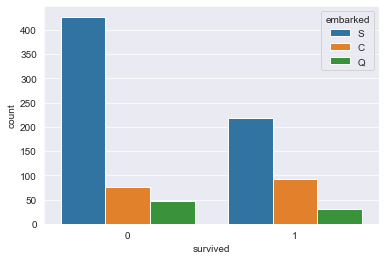

In [64]:
sns.countplot(df['survived'],hue=df['embarked'])

<AxesSubplot:xlabel='sex', ylabel='count'>

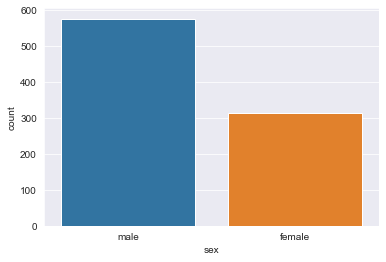

In [65]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='adult_male', ylabel='count'>

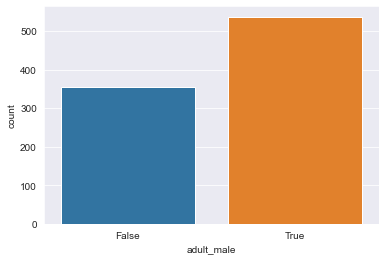

In [66]:
sns.countplot(df['adult_male'])

### Analysis :
    1. The number of people not survived is greater than the number of people survived.
    2. Class 3 Passengers died mostly and class 1 passengers survived mostly.
    3. Out of Non_Survivers Males died mostly and Female Passengers survived mostly.
    4. Most of the passengers are between 28-29 years of old.
    5. Passengers with higher fare survided mostly.
    6. Most of the People embarked from the Southampton.
    7. There are duplicate columns in the data which must be dropped.

### Before dropping the duplicate columns let's convert the categorical data into numerical data and then check the correlation.

In [67]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [68]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [69]:
df.sex.replace({'male':1,'female':0},inplace=True)

In [70]:
df.sex.dtype

dtype('int64')

In [71]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [72]:
df.embarked.replace({'S':1, 'C':2, 'Q':3},inplace=True)

In [73]:
df.embarked.dtype

dtype('int64')

In [74]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [75]:
df['class'].replace({'Third':3, 'First':1, 'Second':2},inplace=True)

In [76]:
df['class'].dtype

dtype('int64')

In [77]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [78]:
df['who'].replace({'man':1, 'woman':2, 'child':3},inplace=True)

In [79]:
df['who'].dtype

dtype('int64')

In [80]:
df['adult_male'].unique()

array([ True, False])

In [81]:
df['adult_male'].replace({True:1, False:0},inplace=True)

In [82]:
df['adult_male'].dtype

dtype('int64')

In [83]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [84]:
df['embark_town'].replace({'Southampton':1, 'Cherbourg':2, 'Queenstown':3},inplace=True)

In [85]:
df['embark_town'].dtype

dtype('int64')

In [86]:
df['alive'].unique()

array(['no', 'yes'], dtype=object)

In [87]:
df['alive'].replace({'no':0, 'yes':1},inplace=True)

In [88]:
df['alive'].dtype

dtype('int64')

In [89]:
df['alone'].unique()

array([False,  True])

In [90]:
df['alone'].replace({True:1, False:0},inplace=True)

In [91]:
df['alive'].dtype

dtype('int64')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    int64  
 11  embark_town  891 non-null    int64  
 12  alive        891 non-null    int64  
 13  alone        891 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 97.6 KB


### All the features are converted into numberical features..

### Let's check the correlation..

In [93]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811,-0.338481,0.472637,-0.557080,0.106811,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702,1.000000,-0.016018,0.094035,0.045702,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569,0.131900,-0.722076,0.908578,-0.116569,-0.543351,0.303646
age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165,-0.339898,-0.432737,0.247704,-0.009165,-0.064910,0.171647
sibsp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961,0.083081,0.342977,-0.253586,-0.059961,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665,0.018443,0.413947,-0.349943,-0.078665,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142,-0.549500,0.136513,-0.182024,0.062142,0.257307,-0.271832
embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000,0.045702,0.075085,-0.108547,1.000000,0.106811,0.017807
class,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702,1.000000,-0.016018,0.094035,0.045702,-0.338481,0.135207
who,0.472637,-0.016018,-0.722076,-0.432737,0.342977,0.413947,0.136513,0.075085,-0.016018,1.000000,-0.914615,0.075085,0.472637,-0.452753


<AxesSubplot:>

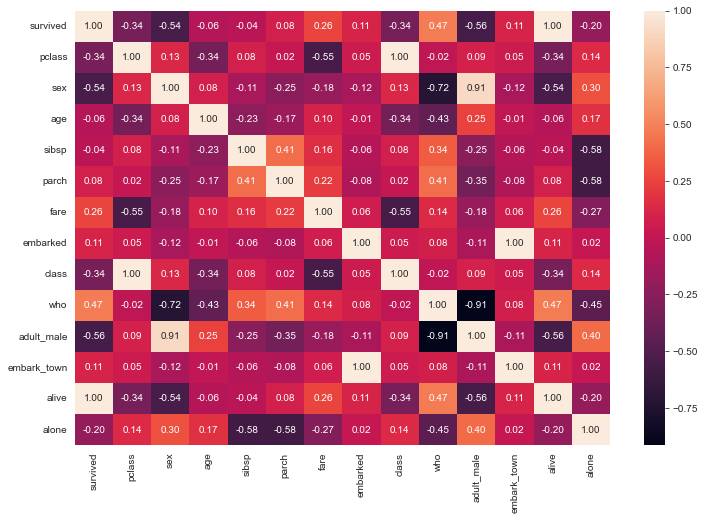

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

### We will drop those columns which are morethan 80% correlated with any of the other columns..

In [95]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [96]:
df.drop(columns=['alive','adult_male','embark_town','class'],axis=1,inplace=True)

In [97]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,1,22.0,1,0,7.2500,1,1,0
1,1,1,0,38.0,1,0,71.2833,2,2,0
2,1,3,0,26.0,0,0,7.9250,1,2,1
3,1,1,0,35.0,1,0,53.1000,1,2,0
4,0,3,1,35.0,0,0,8.0500,1,1,1


### Let's the split our data and proceed for model building..But before that we need to scale our data..

In [98]:
X=df.drop(columns=['survived'],axis=1)
y=df['survived']

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scalar=MinMaxScaler()

In [101]:
scaled_X=scalar.fit_transform(X)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=100)

### Let's import different ML modules:

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Creating Objects of the Modules..

In [105]:
lr=LogisticRegression()
svm=SVC()
mb=MultinomialNB()
dtree=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

### Let's check which model with which parameters is giving the best score.. We will do Hyperparameter Tunning..

In [106]:
model_param={
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,10,50,70,100],
            'gamma':[.1,.01,.001,.0001,1],
            'kernel':['rbf','linear','poly'] } },
    'lr':{
        'model':LogisticRegression(),
          'params': {
              'solver':['lbfgs','liblinear'],
              'C':[1,5,10]}},
    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,70,100],
            'criterion':['gini','entropy']}},
    'mb':{
        'model':MultinomialNB(),
        'params':{
            'alpha':[.1,1,10,100]}},
    'dtree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']}},
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,5,8,10,12]}}    

}


In [107]:
model_param

{'svm': {'model': SVC(),
  'params': {'C': [1, 10, 50, 70, 100],
   'gamma': [0.1, 0.01, 0.001, 0.0001, 1],
   'kernel': ['rbf', 'linear', 'poly']}},
 'lr': {'model': LogisticRegression(),
  'params': {'solver': ['lbfgs', 'liblinear'], 'C': [1, 5, 10]}},
 'rf': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 70, 100],
   'criterion': ['gini', 'entropy']}},
 'mb': {'model': MultinomialNB(), 'params': {'alpha': [0.1, 1, 10, 100]}},
 'dtree': {'model': DecisionTreeClassifier(),
  'params': {'criterion': ['gini', 'entropy']}},
 'knn': {'model': KNeighborsClassifier(),
  'params': {'n_neighbors': [3, 5, 8, 10, 12]}}}

In [108]:
model_param.keys()

dict_keys(['svm', 'lr', 'rf', 'mb', 'dtree', 'knn'])

In [109]:
model_param.values()

dict_values([{'model': SVC(), 'params': {'C': [1, 10, 50, 70, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001, 1], 'kernel': ['rbf', 'linear', 'poly']}}, {'model': LogisticRegression(), 'params': {'solver': ['lbfgs', 'liblinear'], 'C': [1, 5, 10]}}, {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 70, 100], 'criterion': ['gini', 'entropy']}}, {'model': MultinomialNB(), 'params': {'alpha': [0.1, 1, 10, 100]}}, {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy']}}, {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 5, 8, 10, 12]}}])

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
score=[]
for model_name,model_parameters in model_param.items():
    final_clf=GridSearchCV(model_parameters['model'],model_parameters['params'],cv=5)
    final_clf.fit(X_train,y_train)
    score.append({
        'model':model_name,
        'best_score':final_clf.best_score_,
        'best_params':final_clf.best_params_
    })

In [112]:
score

[{'model': 'svm',
  'best_score': 0.8356938835812076,
  'best_params': {'C': 1, 'gamma': 1, 'kernel': 'poly'}},
 {'model': 'lr',
  'best_score': 0.8160346695557964,
  'best_params': {'C': 1, 'solver': 'liblinear'}},
 {'model': 'rf',
  'best_score': 0.8075445681079485,
  'best_params': {'criterion': 'entropy', 'n_estimators': 100}},
 {'model': 'mb',
  'best_score': 0.7921205555008373,
  'best_params': {'alpha': 0.1}},
 {'model': 'dtree',
  'best_score': 0.7696542893725992,
  'best_params': {'criterion': 'gini'}},
 {'model': 'knn',
  'best_score': 0.8258741258741258,
  'best_params': {'n_neighbors': 12}}]

In [113]:
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,svm,0.835694,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}"
1,lr,0.816035,"{'C': 1, 'solver': 'liblinear'}"
2,rf,0.807545,"{'criterion': 'entropy', 'n_estimators': 100}"
3,mb,0.792121,{'alpha': 0.1}
4,dtree,0.769654,{'criterion': 'gini'}
5,knn,0.825874,{'n_neighbors': 12}


### So we can conclude that SVM is performing best with these parameters : {'C': 1, 'gamma': 1, 'kernel': 'poly'}

In [114]:
model=SVC(C=1,gamma=1,kernel='poly')

In [115]:
model.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='poly')

In [116]:
pred=model.predict(X_test)

### Let's check the performance..

In [117]:
from sklearn.metrics import confusion_matrix,classification_report

In [118]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[100   4]
 [ 28  47]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       104
           1       0.92      0.63      0.75        75

    accuracy                           0.82       179
   macro avg       0.85      0.79      0.80       179
weighted avg       0.84      0.82      0.81       179



In [119]:
model.score(X_test,y_test)

0.8212290502793296

### Let's try to see if by chaning the random_state we can imrove the score or not..

In [120]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=2)

In [121]:
model.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='poly')

In [122]:
model.score(X_test,y_test)

0.8

In [123]:
model_scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=i)
    model.fit(X_train,y_train)
    model_scores.append(model.score(X_test,y_test))    

In [124]:
model_scores

[0.8305084745762712,
 0.7796610169491526,
 0.8,
 0.8033898305084746,
 0.8542372881355932,
 0.8372881355932204,
 0.8372881355932204,
 0.7966101694915254,
 0.8406779661016949,
 0.7966101694915254,
 0.8305084745762712,
 0.8305084745762712,
 0.7796610169491526,
 0.8203389830508474,
 0.8338983050847457,
 0.8406779661016949,
 0.8135593220338984,
 0.7932203389830509,
 0.8169491525423729,
 0.8440677966101695,
 0.8033898305084746,
 0.8101694915254237,
 0.7932203389830509,
 0.823728813559322,
 0.8440677966101695,
 0.8033898305084746,
 0.7864406779661017,
 0.8169491525423729,
 0.7898305084745763,
 0.8271186440677966,
 0.8101694915254237,
 0.8169491525423729,
 0.8203389830508474,
 0.8542372881355932,
 0.8508474576271187,
 0.8508474576271187,
 0.8542372881355932,
 0.8135593220338984,
 0.8203389830508474,
 0.8440677966101695,
 0.8372881355932204,
 0.8338983050847457,
 0.823728813559322,
 0.7932203389830509,
 0.8169491525423729,
 0.847457627118644,
 0.864406779661017,
 0.8338983050847457,
 0.82711864

In [125]:
np.argmax(model_scores)

400

In [126]:
model_scores[400]

0.8813559322033898

### Conclusion from at random_state=400 we are getting the best model score..

In [127]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=400)

In [128]:
model.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='poly')

In [129]:
model.score(X_test,y_test)

0.8813559322033898

In [130]:
model_pred=model.predict(X_test)

In [131]:
print(confusion_matrix(y_test,model_pred))
print(classification_report(y_test,model_pred))

[[180  10]
 [ 25  80]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       190
           1       0.89      0.76      0.82       105

    accuracy                           0.88       295
   macro avg       0.88      0.85      0.87       295
weighted avg       0.88      0.88      0.88       295

